In [49]:
import json
import os
import pandas as pd
import numpy as np



In [66]:
df = pd.DataFrame(columns=["id", "name", "conf", "oe", "de", "ne", "adjoe", "adjde", "adjne", "sos"])
for f in os.listdir("../data/web/ts/v2"):
    with open(f"../data/web/ts/v2/{f}") as file:
        d = json.load(file)
        df = df.append({
            "id": d["id"],
            "name": d["name"],
            "conf": d["conf"],
            "oe": d["stats"]["OE"],
            "de": d["stats"]["DE"],
            "ne": d["stats"]["NE"],
            "adjoe": d["stats"]["AdjOE"],
            "adjde": d["stats"]["AdjDE"],
            "adjne": d["stats"]["AdjNE"],
            "sos": d["sos"]
        }, ignore_index=True)

/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_94328/697430621.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_94328/697430621.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_94328/697430621.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_94328/697430621.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_94328/697

In [37]:
df.head(5)

,id,name,conf,oe,de,ne,adjoe,adjde,adjne,sos
0,1221,Holy Cross,patriot,93.146,104.271,-11.125,85.941,96.097,-10.156,0.473
1,1367,SC Upstate,big_south,97.785,103.319,-5.533,95.371,99.827,-4.456,0.469
2,1198,Florida Intl,cusa,99.570,103.699,-4.128,101.386,106.347,-4.961,0.517
3,1151,Chattanooga,southern,107.421,105.825,1.596,105.530,103.678,1.852,0.489


In [67]:
df["AdjOEDiff"] = df["adjoe"] - df["oe"]
df["AdjDEDiff"] = df["adjde"] - df["de"]
df["AdjNEDiff"] = df["adjne"] - df["ne"]

In [88]:
for k,v in df.groupby("conf")[["AdjOEDiff"]].mean().items():
    print(k, v)

AdjOEDiff conf
a_sun         1.355429
a_ten         0.562333
aac           2.135636
acc           6.244400
aec          -3.220333
big_east      4.805727
big_sky      -1.306900
big_south    -3.046300
big_ten       5.280857
big_twelve    5.671500
big_west     -3.288909
caa          -1.806077
cusa          2.399182
horizon      -2.137818
ind          -3.903500
ivy          -2.325500
maac         -4.219636
mac           0.069250
meac         -2.406500
mvc          -0.580583
mwc           5.706000
nec          -8.248111
ovc          -4.684500
pac_twelve    2.301083
patriot      -5.308400
sec           5.450500
southern     -1.850800
southland    -3.436100
summit       -0.032600
sun_belt     -0.998429
swac         -6.467083
wac           0.567308
wcc           5.587800
Name: AdjOEDiff, dtype: float64


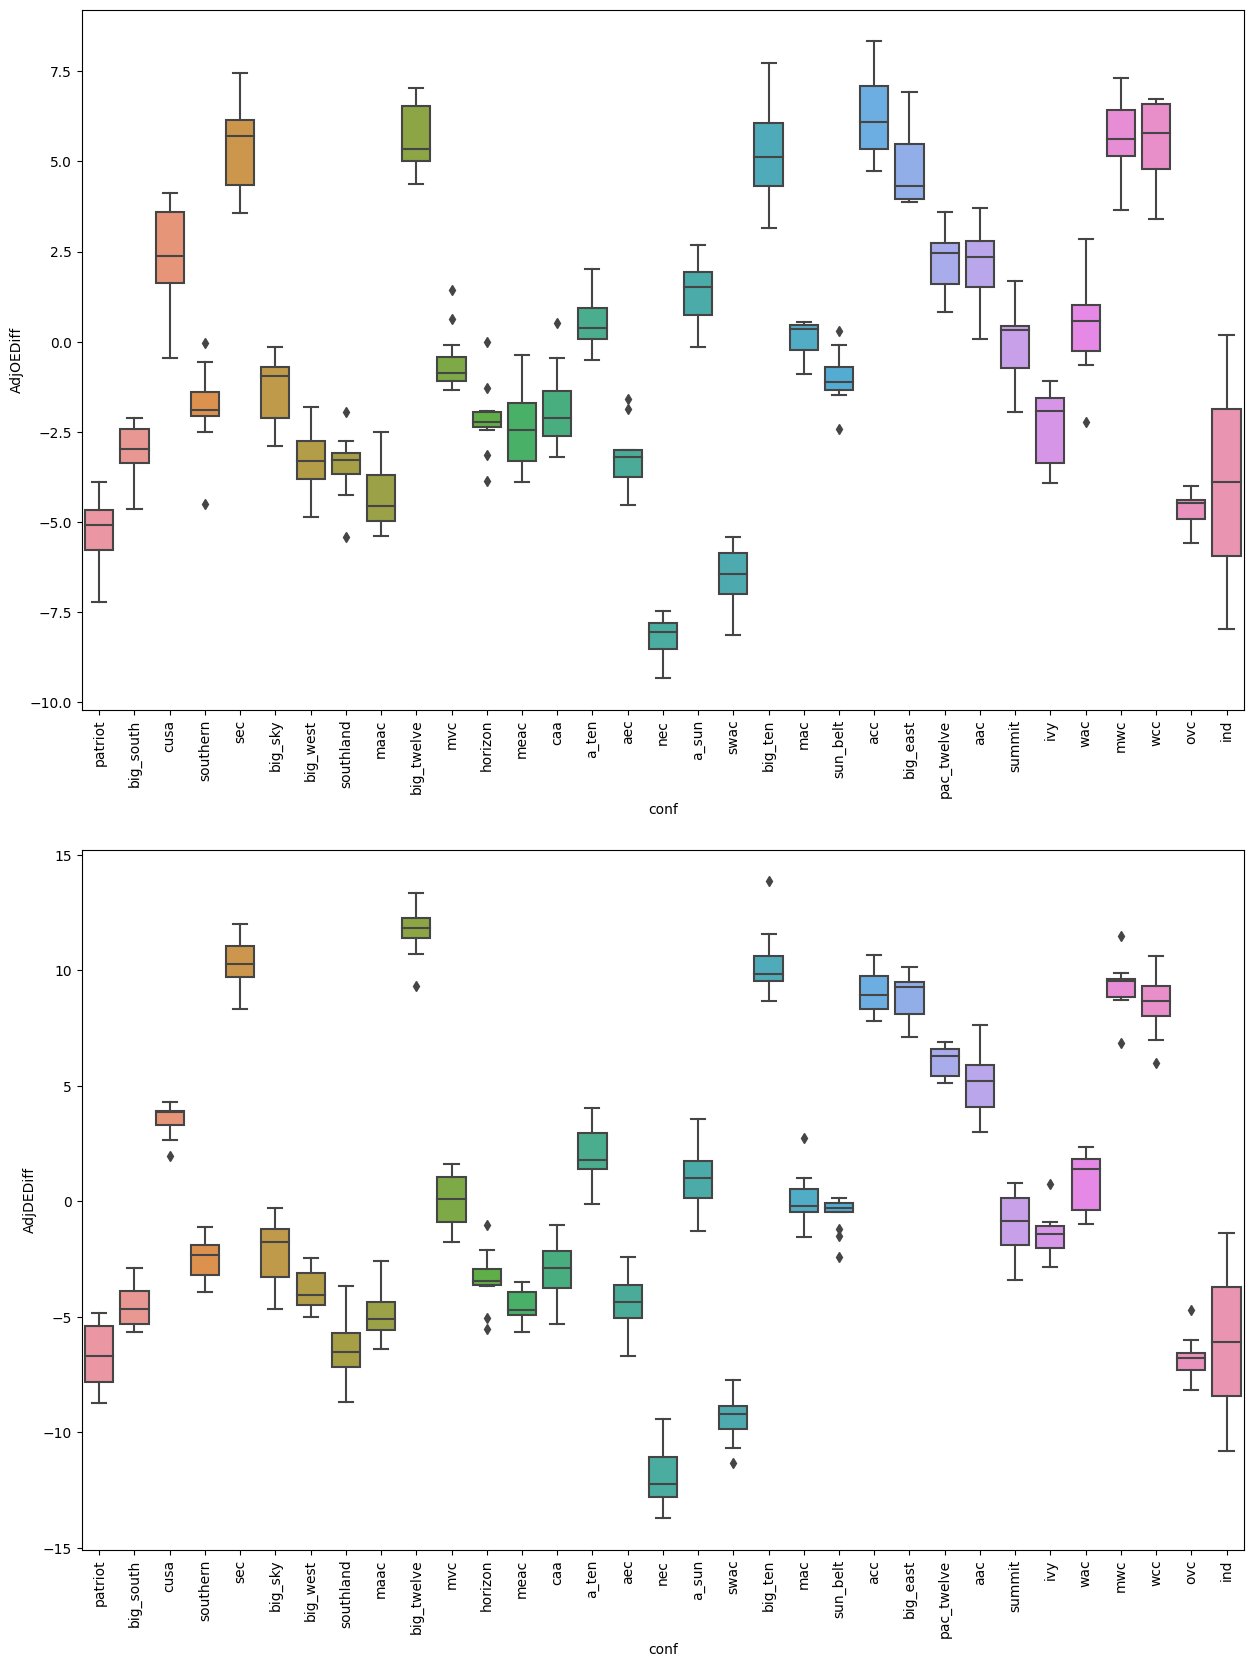

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
# Make one box and whisker plot for each conference for the adjusted offensive efficiency and another for the adjusted defensive efficiency
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
sns.boxplot(x="conf", y="AdjOEDiff", data=df, ax = ax[0])
ax[0].xaxis.set_tick_params(rotation=90)

sns.boxplot(x="conf", y="AdjDEDiff", data=df, ax = ax[1])
plt.xticks(rotation=90)
plt.show()